In [1]:
import pandas as pd
df = pd.read_csv("churn.csv")          # telecom company
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [3]:
df.shape

(3150, 14)

In [7]:
# find class imbalance
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

<Axes: xlabel='Churn'>

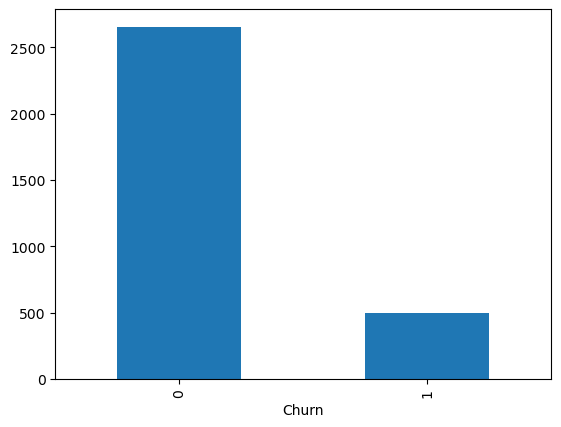

In [9]:
df["Churn"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

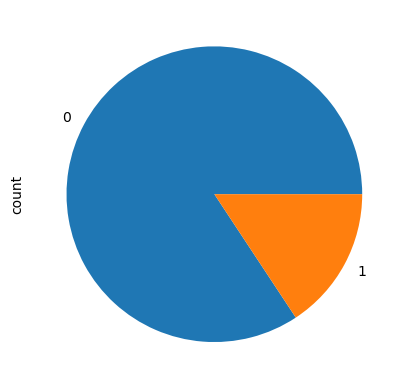

In [11]:
df["Churn"].value_counts().plot(kind="pie")

In [13]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [15]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , stratify = y, random_state = 42 )

# Logistic Regression Model Training 

In [19]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1500)

In [25]:
y_pred = model.predict(X_test)

# Model Evaluation - Logistic Regression

In [28]:
from sklearn.metrics import classification_report

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.84      0.41      0.55        99

    accuracy                           0.90       630
   macro avg       0.87      0.70      0.75       630
weighted avg       0.89      0.90      0.88       630



recall for class 1 is 0.41
I am able to predict only 40% of customers who are likely to churn  is bad
Recall finds all relevant/TP cases in a dataset.

It's especially important when missing a positive case is costly:

Medical diagnoses (missing a disease = bad).

Fraud detection (missing fraud = big risk).

Animal adoption prediction (missing high-likelihood adopters = missed opportunity).

To improve my recall score as I want to find more customers who are likely to churn so that I can improve my service for them and help not to churn them

# UnderSampling to address class imbalance

!pip install imblearn

Undersampling performed only on training data

In [35]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)
y_train_rus.value_counts()

Churn
0    396
1    396
Name: count, dtype: int64

# Model Evaluation with undersampling and class balance - Logistic Regression

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_rus,y_train_rus)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
y_pred = model.predict(X_test)

In [48]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       531
           1       0.45      0.84      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.82      0.73       630
weighted avg       0.88      0.81      0.83       630



recall improved, for this scenario, recall is important which improved because of class balance in the data

# Over Sampling using SMOTE to address class imbalance

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

In [59]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.74       630
weighted avg       0.89      0.81      0.83       630



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# recall increased by 2%

# Over Sampling using SMOTE tomek links to address class imbalance

In [62]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)
y_train_tomek.value_counts()

Churn
0    2091
1    2091
Name: count, dtype: int64

the counts are low compared to smote because it removed some synthetically generated points for the clear boundary

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tomek,y_train_tomek)
y_pred = model.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.45      0.86      0.59        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.89      0.81      0.83       630



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# SMOTE creates synthetic samples of the minority class to balance the dataset
# SMOTE Tomek Links helps in removing overlapping instances between classes